In [1]:
import networkx as nx
from load_data import weighted_network_creation
from utils import plt_directed
import pandas as pd
import numpy as np
from IPython.core.display import HTML

# Homophily Analysis

As we have seen before, it seems not to be wrong to study the undirected graph version. We will thus analyze the homophily in the undirected weighted version of the Airport_Network.

**Homophily is the tendency of individuals to associate and bond with similar others, as in the proverb "birds of a feather flock together".** The presence of homophily has been discovered in a vast array of network studies. More than 100 studies that have observed homophily in some form or another and they establish that similarity breeds connection. These include age, gender, class, and organizational role.

Individuals in homophilic relationships share common characteristics (beliefs, values, education, etc.) that make communication and relationship formation easier. The opposite of homophily is heterophily or intermingling.

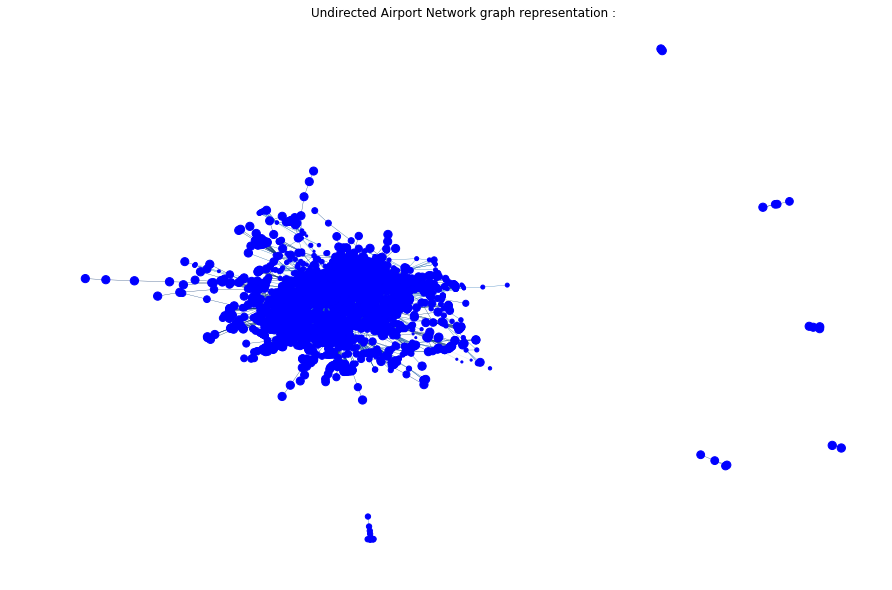

Name: 
Type: Graph
Number of nodes: 3334
Number of edges: 19205
Average degree:  11.5207


In [2]:
Airport_Network_weighted = weighted_network_creation()
# Use the undirected version of the network for this one.
Undirected_Airport_Network = Airport_Network_weighted.to_undirected()
# Plot the graph
plt_directed(Undirected_Airport_Network, 'Undirected Airport Network graph representation :')
# Print basic informations on this new graph
print(nx.info(Undirected_Airport_Network))

The number of edges is decreasing compared to the previous analysis as we study now the undirected version of the graph.

We calculate the percentage of nodes that belong to each of the country :

In [3]:
# Creation of the dataframe containing the information of each nodes. Each line correspond to a node.
df = pd.DataFrame.from_dict(dict(Undirected_Airport_Network.nodes(data=True)), orient='index')

In [4]:
# Creation of the dataframe containing the information of each nodes. Each line correspond to a node.
df = pd.DataFrame.from_dict(dict(Undirected_Airport_Network.nodes(data=True)), orient='index')

# We focus on country having the biggest number of nodes
FocusCountries = ['Australia', 'Russia','United States','France', 'Canada', 'Germany', 'India', 'Brazil', 'United Kingdom', 'Japan', 'South Africa', 'Spain', 'China','Indonesia','Mexico', 'Norway', 'Colombia', 'Turkey']

# We iterate on the dataframe containing information of the nation and we create the 'Other' category.
list_country = []
for i in df['Country']:
    if i in FocusCountries:
        list_country.append(i)
    else :
        list_country.append('Other')

# We replace the feature with the new created list containing the categroy 'Other'
df['Country'] = list_country
df['Count'] = 1

# We groupby all the nodes having the same nation and we sum the count feature to have the number of node per nation
df_percentage = df.groupby('Country').sum()
df_percentage['percentage'] = df_percentage['Count']/df_percentage['Count'].sum()
display(HTML(df_percentage.drop(['Latitude', 'Longitude'], axis=1).to_html()))

# We check if the sum of the count feature is the total number of node in the graph and if the sum of the percentage is 1
df_percentage.drop(['Latitude', 'Longitude'], axis=1).sum()

,Count,percentage
Country,,
Australia,113,0.033893
Brazil,122,0.036593
Canada,206,0.061788
China,157,0.047091
Colombia,48,0.014397
France,55,0.016497
Germany,32,0.009598
India,70,0.020996
Indonesia,63,0.018896


Count         3334.0
percentage       1.0
dtype: float64

We then calculate the total number of links that nodes of each nation participate in. To do that we sum the degrees of all the nodes of each nation.

In [5]:
degree_list=[]
# We store the dictionary containing as key the id of the node and as value the degree of the node
degree = nx.degree(Undirected_Airport_Network)

# We iterate on all the node of the graph with df.index and we add the degree feature in the overall dataframe
for i in df.index:
    degree_list.append(degree[i])
df['Degree'] = degree_list

# We do the same process as before but this time we are not interesting in summing the count column made with 1 but the degree column
df_nb_link = df.groupby('Country').sum()
df_nb_link.rename(columns = {'Degree':'Degree_Sum'}, inplace = True)
display(HTML(df_nb_link.drop(['Latitude', 'Longitude'], axis=1).to_html()))

# We check if the sum of the count feature is the total number of node in the graph 
# and if the sum of the degree_sum feature is two times the total number of edge in the graph (as we are in a undirected situation) = 19257*2 = 38514
df_nb_link.drop(['Latitude', 'Longitude'], axis=1).sum()

,Count,Degree_Sum
Country,,
Australia,113,587
Brazil,122,859
Canada,206,1211
China,157,3333
Colombia,48,212
France,55,1212
Germany,32,1422
India,70,609
Indonesia,63,401


Count          3334
Degree_Sum    38410
dtype: int64

For each of the nations, we calculate the number of links to country of the other countries :

In [6]:
# Creation of the dataframe containing the information of each edge. Each line correspond to an edge.
df_edges= pd.DataFrame.from_dict(Undirected_Airport_Network.edges()).rename(columns = {0:'index', 1:'Target_node'}).set_index('index')

# We add to the list of Focus Countries, the category called Other as we want to take it into account
list_category = list(FocusCountries)
list_category.append('Other')

# We create the dataframe were the result will be store and we fill it with 0.
df_out = pd.DataFrame(index = df.index, columns = list_category).fillna(0)

for idx_source in df_out.index: # Here we iterate on each node of the graph
    if idx_source in df_edges.index : # We check if the id of the node taking into account has edges as source node
        df_tmp = df_edges.loc[idx_source] # We select the different edges with the node id corresponding to the source node
        if df_tmp.shape[0] > 1 : # This condition check if there are several edges going out of this source node
            for idx_target in df_tmp['Target_node']: # We iterate on the several edges taking into account the id of the target node
                country_target = df.loc[idx_target]['Country'] # We find the country of the target node
                df_out.loc[idx_source][country_target] += 1 # We add one to the corresponding category in the output dataframe
                country_source = df.loc[idx_source]['Country'] # We do the same for the target node coming from the edge taking into account
                df_out.loc[idx_target][country_source] += 1 
        elif df_tmp.shape[0] == 1 : # This condition check if there is just one edge going out of this source node and we do the same as before
            country_target = df.loc[df_tmp['Target_node']]['Country']
            df_out.loc[idx_source][country_target] += 1 
            country_source = df.loc[idx_source]['Country']
            df_out.loc[df_tmp['Target_node']][country_source] += 1 
            
# We add to the output dataframe the feature containing the nation of each node to allow a groupby
df_out = pd.merge(df[['Country']], df_out, left_index=True, right_index=True).rename(columns = {'Country':'country_source'})
df_out = df_out.groupby('country_source').sum()
df_out = df_out[df_out.index]
display(HTML(df_out.to_html()))

print(f'To verify the answer, we check that the number total of edges should be the same as the one print in graph info times 2: {df_out.sum().sum()}')
print(f'This is the case.')


print('Here we verify if the output of the sum of our output dataframe is the same as for the previous part :\n')
print(df_out.sum(), '\n')
print(df_out.sum(axis = 1))

,Australia,Brazil,Canada,China,Colombia,France,Germany,India,Indonesia,Japan,Mexico,Norway,Other,Russia,South Africa,Spain,Turkey,United Kingdom,United States
country_source,,,,,,,,,,,,,,,,,,,
Australia,454,0,1,10,0,0,0,2,11,6,0,0,92,0,2,0,0,0,9
Brazil,0,730,1,0,2,3,5,0,0,0,1,0,82,0,1,4,1,2,27
Canada,1,1,860,8,1,9,9,0,0,4,17,0,116,2,0,3,1,17,162
China,10,0,8,2652,0,4,9,5,8,56,1,0,521,29,1,1,4,5,19
Colombia,0,2,1,0,144,1,1,0,0,0,2,0,39,0,0,4,0,0,18
France,0,3,9,4,1,312,57,3,0,3,2,11,559,8,1,86,19,112,22
Germany,0,5,9,9,1,57,144,7,0,6,4,15,744,33,2,202,68,73,43
India,2,0,0,5,0,3,7,358,0,2,0,0,218,2,1,0,2,5,4
Indonesia,11,0,0,8,0,0,0,0,302,6,0,0,74,0,0,0,0,0,0


To verify the answer, we check that the number total of edges should be the same as the one print in graph info times 2: 38410
This is the case.
Here we verify if the output of the sum of our output dataframe is the same as for the previous part :

Australia           587
Brazil              859
Canada             1211
China              3333
Colombia            212
France             1212
Germany            1422
India               609
Indonesia           401
Japan               625
Mexico              549
Norway              501
Other             15117
Russia             1284
South Africa        151
Spain              1388
Turkey              647
United Kingdom     1567
United States      6735
dtype: int64 

country_source
Australia           587
Brazil              859
Canada             1211
China              3333
Colombia            212
France             1212
Germany            1422
India               609
Indonesia           401
Japan               625
Mexico              549
N

We now divide the link counts calculated in the previous step by the link counts calculated in 2 previous steps. What you will get here is, for example, the percentage of links of the country from France that go to Italians airport.

In [7]:
df_out_percentage = df_out.copy() # We make a copy of the out dataset to create the one where we will store the percentage
for i in df_nb_link.index:
    df_out_percentage.loc[i] /= df_nb_link.loc[i]['Degree_Sum'] # We use the dataframe previously calculated
display(HTML(df_out_percentage.to_html()))

,Australia,Brazil,Canada,China,Colombia,France,Germany,India,Indonesia,Japan,Mexico,Norway,Other,Russia,South Africa,Spain,Turkey,United Kingdom,United States
country_source,,,,,,,,,,,,,,,,,,,
Australia,0.773424,0.000000,0.001704,0.017036,0.000000,0.000000,0.000000,0.003407,0.018739,0.010221,0.000000,0.000000,0.156729,0.000000,0.003407,0.000000,0.000000,0.000000,0.015332
Brazil,0.000000,0.849825,0.001164,0.000000,0.002328,0.003492,0.005821,0.000000,0.000000,0.000000,0.001164,0.000000,0.095460,0.000000,0.001164,0.004657,0.001164,0.002328,0.031432
Canada,0.000826,0.000826,0.710157,0.006606,0.000826,0.007432,0.007432,0.000000,0.000000,0.003303,0.014038,0.000000,0.095789,0.001652,0.000000,0.002477,0.000826,0.014038,0.133774
China,0.003000,0.000000,0.002400,0.795680,0.000000,0.001200,0.002700,0.001500,0.002400,0.016802,0.000300,0.000000,0.156316,0.008701,0.000300,0.000300,0.001200,0.001500,0.005701
Colombia,0.000000,0.009434,0.004717,0.000000,0.679245,0.004717,0.004717,0.000000,0.000000,0.000000,0.009434,0.000000,0.183962,0.000000,0.000000,0.018868,0.000000,0.000000,0.084906
France,0.000000,0.002475,0.007426,0.003300,0.000825,0.257426,0.047030,0.002475,0.000000,0.002475,0.001650,0.009076,0.461221,0.006601,0.000825,0.070957,0.015677,0.092409,0.018152
Germany,0.000000,0.003516,0.006329,0.006329,0.000703,0.040084,0.101266,0.004923,0.000000,0.004219,0.002813,0.010549,0.523207,0.023207,0.001406,0.142053,0.047820,0.051336,0.030239
India,0.003284,0.000000,0.000000,0.008210,0.000000,0.004926,0.011494,0.587849,0.000000,0.003284,0.000000,0.000000,0.357964,0.003284,0.001642,0.000000,0.003284,0.008210,0.006568
Indonesia,0.027431,0.000000,0.000000,0.019950,0.000000,0.000000,0.000000,0.000000,0.753117,0.014963,0.000000,0.000000,0.184539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
list_nation_1, list_nation_2, percentage_list, nodes_list  = [], [], [], [] # these list will be used to create our new features
for i in df_out_percentage.index:
    for j in df_out_percentage.columns:
        list_nation_1.append(i) # the index of the df_out_percentage is the source nation
        list_nation_2.append(j) # the index of the df_out_percentage is the target nation
        percentage_list.append(df_out_percentage.loc[i][j]) # we select the corresponding value for the first feature
        nodes_list.append(df_percentage.loc[j]['percentage']) # we use the dataframe create in question 1 to fill up this feature

# We create the returned dataframe and we fill up the features
df_resume = pd.DataFrame(columns = ['Nation_1', 'Nation_2', '%_of_Nation_1_links_going_to_Nation_2', '%_of_nodes_that_belong_to_Nation_2', 'Ratio_of_the_two_previous_columns'])
df_resume['Nation_1'] = list_nation_1
df_resume['Nation_2'] = list_nation_2
df_resume['%_of_Nation_1_links_going_to_Nation_2'] = percentage_list
df_resume['%_of_nodes_that_belong_to_Nation_2'] = nodes_list 
df_resume['Ratio_of_the_two_previous_columns'] =  df_resume['%_of_Nation_1_links_going_to_Nation_2'] / df_resume['%_of_nodes_that_belong_to_Nation_2']
# We keep the one that are superior to 5
df_resume_tmp = df_resume[df_resume['Ratio_of_the_two_previous_columns']>5]


print('Countries with a ratio of %_of_Nation_1_links_going_to_Nation_2 over %_of_nodes_that_belong_to_Nation_2 superior to 5 :')
display(HTML(df_resume_tmp.sort_values('Ratio_of_the_two_previous_columns', ascending = False).to_html()))

Countries with a ratio of %_of_Nation_1_links_going_to_Nation_2 over %_of_nodes_that_belong_to_Nation_2 superior to 5 :


,Nation_1,Nation_2,%_of_Nation_1_links_going_to_Nation_2,%_of_nodes_that_belong_to_Nation_2,Ratio_of_the_two_previous_columns
280,South Africa,South Africa,0.437086,0.005399,80.958057
80,Colombia,Colombia,0.679245,0.014397,47.179245
160,Indonesia,Indonesia,0.753117,0.018896,39.855441
220,Norway,Norway,0.510978,0.014697,34.767363
200,Mexico,Mexico,0.582878,0.016797,34.702056
180,Japan,Japan,0.560000,0.018596,30.113548
140,India,India,0.587849,0.020996,27.998405
320,Turkey,Turkey,0.315301,0.012298,25.639386
20,Brazil,Brazil,0.849825,0.036593,23.223916
0,Australia,Australia,0.773424,0.033893,22.819436


In [9]:
# We keep the one that are inferior to 0.05
df_resume_tmp_2 = df_resume[df_resume['Ratio_of_the_two_previous_columns']<0.05]

print('Countries with a ratio of %_of_Nation_1_links_going_to_Nation_2 over %_of_nodes_that_belong_to_Nation_2 inferior to 0.05')
display(HTML(df_resume_tmp_2.sort_values('Ratio_of_the_two_previous_columns', ascending = False).to_html()))

Countries with a ratio of %_of_Nation_1_links_going_to_Nation_2 over %_of_nodes_that_belong_to_Nation_2 inferior to 0.05


,Nation_1,Nation_2,%_of_Nation_1_links_going_to_Nation_2,%_of_nodes_that_belong_to_Nation_2,Ratio_of_the_two_previous_columns
191,Mexico,Brazil,0.001821,0.036593,0.049778
118,Germany,Colombia,0.000703,0.014397,0.048846
227,Norway,United States,0.007984,0.164967,0.048398
322,Turkey,United States,0.007728,0.164967,0.046846
257,Russia,Mexico,0.000779,0.016797,0.046367
305,Turkey,Brazil,0.001546,0.036593,0.042238
353,United States,Norway,0.000594,0.014697,0.040410
151,India,United States,0.006568,0.164967,0.039815
342,United States,Australia,0.001336,0.033893,0.039427
59,China,Canada,0.002400,0.061788,0.038847


**In our network case, we are able to observe high Homophily between airports from the same nation. Thus, it's a country belonging homophily.** In fact, we can see in the table above and in a data frame printed before in step 4 (by looking at the diagonal of the output data frame) that **proportion of links linking airports from the same country is extremely high compared to links pointing to a foreign country.** This is really visible in the previous table thanks to the feature ratio of percentage_of_Nation_1_links_going_to_Nation_2 divide by percentage_of_nodes_that_belong_to_Nation_2 where the values for the same country are higher compared to values for different countries.

In addition, we are able **to identify countries that have no connections going from nation 1 to nation 2.** These are countries having really weak connexions. This means that to link these nations, **it's mandatory to make a stop in another country and take another flight. These kind of connection are the weak ties linking some subgraph.** This is really observable in the printed dataframe just above. The countries having no connexions are majority countries with a huge distance (in term of physical distance like kilometers) separating them, like for example, Indonesia or Australia with the rest of the world. This fact can also be an effect of the foreign politics of some countries which are quite close to foreigners. 


***To conclude this part, a country belonging homophily has been found. This would mean that the entire graph is made by collections of smaller graphs as we said in the analysis before. The new information found here is that this small subnetwork corresponds to the country network. This observation makes sense has the network in a country need to be dense and then weak ties are used to connect countries subnetworks together. Moreover, weak ties presence can be deduced from the existence of countries that have no connections between themselves. It means that it's mandatory to make a stop in another country and take another flight. Thus all these conclusions reaffirm the assumptions made in the previous section on the structure of the graph.***